In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d datamunge/sign-language-mnist

sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelBinarizer

In [ ]:
Image('../content/amer_sign2.png')

In [ ]:
train_df = pd.read_csv('../content/sign_mnist_train.csv')
test_df = pd.read_csv('../content/sign_mnist_test.csv')
print(train_df.shape, test_df.shape)

In [ ]:
train_df.head()

In [ ]:
test = pd.read_csv('../content/sign_mnist_test.csv')
y = test['label']
y

In [ ]:
labels = train_df['label']
unique_values = np.unique(np.array(labels))
unique_values

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(x = labels)

In [ ]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [ ]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [ ]:
x_train = train_df.values
x_test = test_df.values

In [ ]:
# Normalize data
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train = x_train.reshape(-1, 28, 28,1)
x_test = x_test.reshape(-1, 28, 28,1)

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state = 42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_validate.shape)
print(y_validate.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
# Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 128, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 24, activation = 'softmax'))

In [ ]:
cnn_model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
cnn_model.summary()

In [ ]:
# Training the CNN model
history = cnn_model.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data = (x_validate, y_validate))

In [ ]:
print("Accuracy of the model is - " , cnn_model.evaluate(x_test, y_test)[1] * 100 , "%")

225/225 [==============================] - 4s 16ms/step - loss: 0.1805 - accuracy: 0.9474
Accuracy of the model is -  94.74344849586487 %


Text(0.5, 1.0, 'Accuracy Vs Epoch')

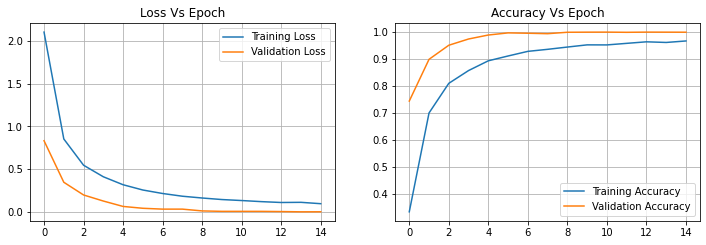

In [ ]:
# Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid()
plt.title('Loss Vs Epoch')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy Vs Epoch')

In [ ]:
predictions = cnn_model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
for i in range(len(predicted_classes)):
    if(predicted_classes[i] >= 9):
        predicted_classes[i] += 1

In [ ]:
accuracy_score = accuracy_score(y, predicted_classes)
print('Accuracy Score = ', accuracy_score)

Accuracy Score =  0.9474344673731177


In [ ]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predicted_classes, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      0.91      0.95       432
     Class 2       0.94      0.95      0.95       310
     Class 3       1.00      0.93      0.97       245
     Class 4       1.00      1.00      1.00       498
     Class 5       1.00      1.00      1.00       247
     Class 6       0.82      0.93      0.87       348
     Class 7       0.99      0.92      0.95       436
     Class 8       0.91      1.00      0.95       288
    Class 10       0.94      0.94      0.94       331
    Class 11       1.00      1.00      1.00       209
    Class 12       0.96      1.00      0.98       394
    Class 13       0.99      0.94      0.96       291
    Class 14       0.93      0.93      0.93       246
    Class 15       0.97      1.00      0.98       347
    Class 16       0.96      1.00      0.98       164
    Class 17       0.73      0.93      0.82       144
    Class 18       0.96    

In [ ]:
cm = confusion_matrix(y, predicted_classes)

In [ ]:
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

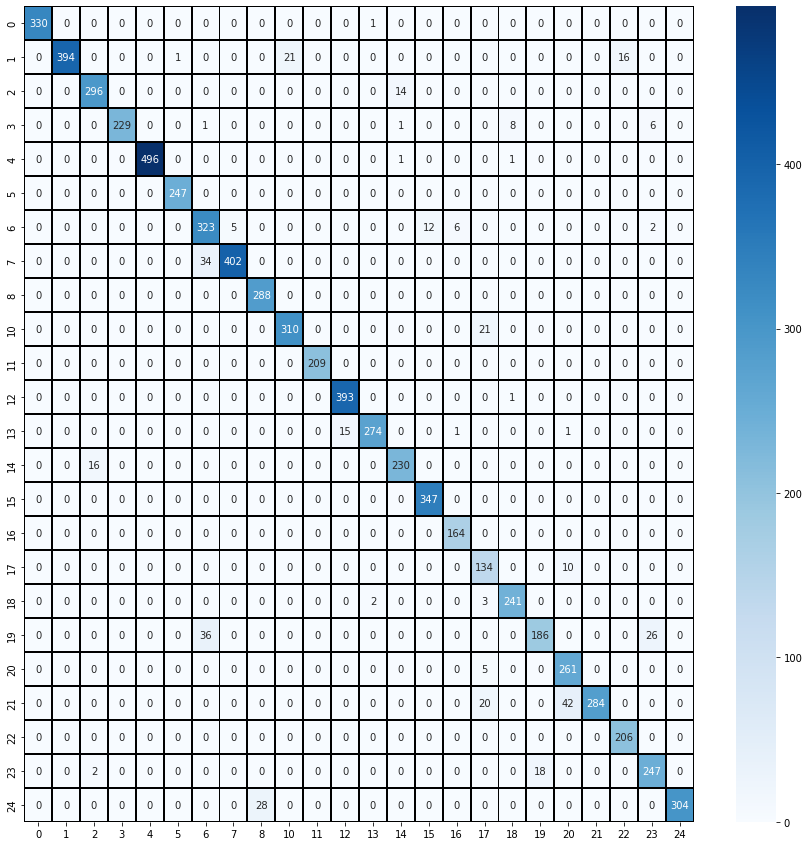

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(cm, cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

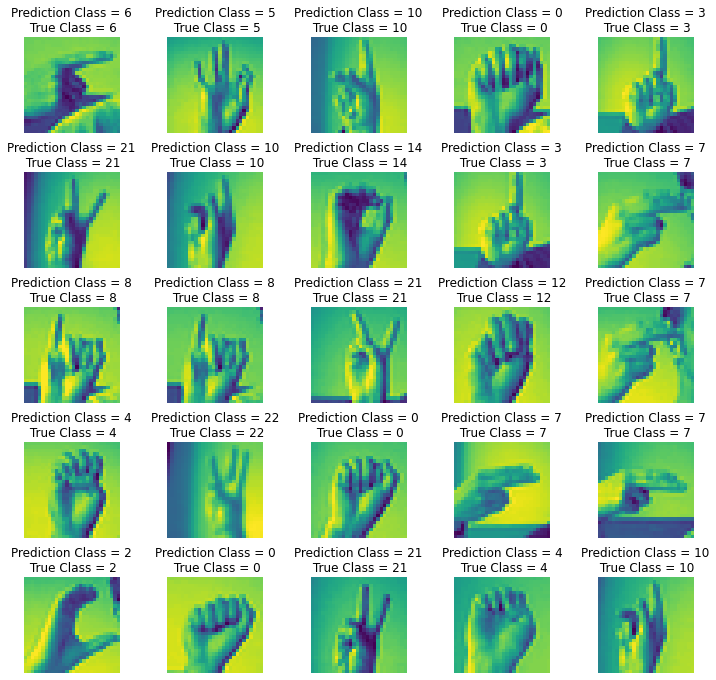

In [ ]:
#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]}\n True Class = {y[i]}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)